In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

 43% 9.00M/20.9M [00:00<00:00, 18.5MB/s]
100% 20.9M/20.9M [00:00<00:00, 42.4MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cattle-breeds-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

train_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/Cattle Breeds",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    seed=123,
    subset="training",

)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/Cattle Breeds",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    seed=123,
    subset="validation",

)

Found 1208 files belonging to 5 classes.
Using 967 files for training.
Found 1208 files belonging to 5 classes.
Using 241 files for validation.


In [ ]:
train_ds.class_names

['Ayrshire cattle',
 'Brown Swiss cattle',
 'Holstein Friesian cattle',
 'Jersey cattle',
 'Red Dane cattle']

In [ ]:
# normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))


model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))


model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #neuron,activation_function

model.add(Dense(64,activation='relu'))

model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 22s 210ms/step - loss: 1.6885 - accuracy: 0.2647 - val_loss: 1.4899 - val_accuracy: 0.3444
Epoch 2/10
31/31 [==============================] - 3s 92ms/step - loss: 1.2689 - accuracy: 0.4405 - val_loss: 1.2971 - val_accuracy: 0.4398
Epoch 3/10
31/31 [==============================] - 3s 84ms/step - loss: 0.9987 - accuracy: 0.6215 - val_loss: 1.4277 - val_accuracy: 0.4647
Epoch 4/10
31/31 [==============================] - 4s 106ms/step - loss: 0.7047 - accuracy: 0.7528 - val_loss: 1.2620 - val_accuracy: 0.5685
Epoch 5/10
31/31 [==============================] - 3s 77ms/step - loss: 0.4191 - accuracy: 0.8718 - val_loss: 1.4262 - val_accuracy: 0.5809
Epoch 6/10
31/31 [==============================] - 3s 83ms/step - loss: 0.3341 - accuracy: 0.9049 - val_loss: 1.3498 - val_accuracy: 0.6390
Epoch 7/10
31/31 [==============================] - 4s 102ms/step - loss: 0.2332 - accuracy: 0.9307 - val_loss: 1.5530 - val_accuracy: 0.5934
Epoch 8/10
31/31 [==

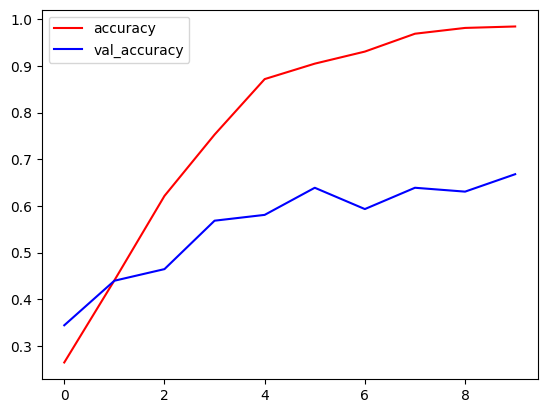

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.legend()


In [ ]:
import cv2

In [ ]:
image=cv2.imread("/content/Cattle Breeds/Brown Swiss cattle/BrownSwisscattle0.jpg")

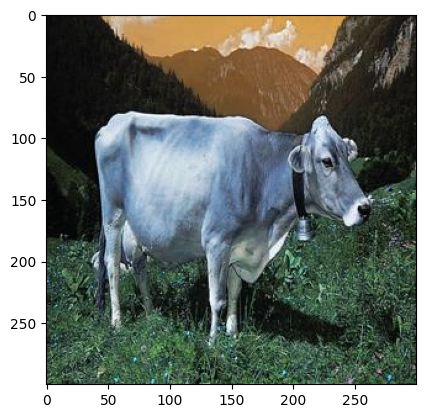

In [ ]:
image.shape

(300, 300, 3)

In [ ]:
img=cv2.resize(image,(256,256))
test_image=img.reshape(1,256,256,3)

In [ ]:
model.predict(test_image)

1/1 [==============================] - 0s 260ms/step


array([[0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# Make a prediction using the model
import numpy as np
predictions = model.predict(test_image)

# Find the index of the maximum predicted value
predicted_class_index = np.argmax(predictions)

# Now you can use the index to map it to the actual class label


class_labels = ['Ayrshire cattle',
 'Brown Swiss cattle',
 'Holstein Friesian cattle',
 'Jersey cattle',
 'Red Dane cattle']  # Replace with your class labels


predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 30ms/step
Predicted class: Brown Swiss cattle


In [ ]:


train_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/Cattle Breeds",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    seed=123,
    subset="training",

)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/Cattle Breeds",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    seed=123,
    subset="validation",

)

Found 1208 files belonging to 5 classes.
Using 967 files for training.
Found 1208 files belonging to 5 classes.
Using 241 files for validation.


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16()

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import Sequential

In [ ]:
model=Sequential()

In [ ]:
## to remove last layer
for layer in vgg.layers[:-1]:
  model.add(layer)

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
## now to freeze conv model means trainable parameters=0
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)



Epoch 1/20
31/31 [==============================] - 6s 179ms/step - loss: 0.1021 - accuracy: 0.9783 - val_loss: 0.3785 - val_accuracy: 0.8672
Epoch 2/20
31/31 [==============================] - 5s 158ms/step - loss: 0.0933 - accuracy: 0.9814 - val_loss: 0.2801 - val_accuracy: 0.9087
Epoch 3/20
31/31 [==============================] - 5s 159ms/step - loss: 0.0594 - accuracy: 0.9866 - val_loss: 0.2757 - val_accuracy: 0.9170
Epoch 4/20
31/31 [==============================] - 5s 169ms/step - loss: 0.0613 - accuracy: 0.9855 - val_loss: 0.2696 - val_accuracy: 0.9253
Epoch 5/20
31/31 [==============================] - 5s 165ms/step - loss: 0.0778 - accuracy: 0.9855 - val_loss: 0.3444 - val_accuracy: 0.8963
Epoch 6/20
31/31 [==============================] - 5s 162ms/step - loss: 0.0748 - accuracy: 0.9886 - val_loss: 0.3195 - val_accuracy: 0.8838
Epoch 7/20
31/31 [==============================] - 7s 208ms/step - loss: 0.0703 - accuracy: 0.9835 - val_loss: 0.2886 - val_accuracy: 0.9004
Epoch 

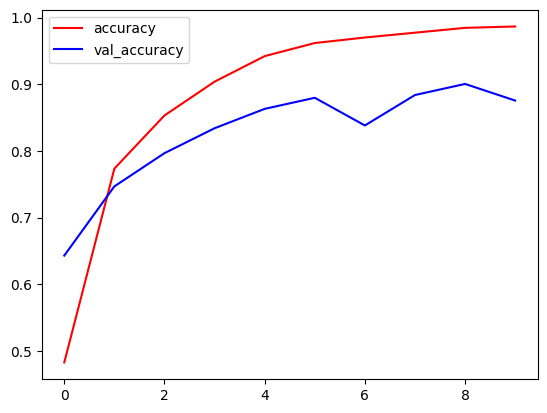

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.legend()